<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv5-MPM-cvr/blob/main/Primer%20Intento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from scipy.stats import cauchy
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve

%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://raw.githubusercontent.com/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv5-MPM-cvr/refs/heads/main/Sample5.csv',delimiter=',')
particles



Run      Event       pt     eta     phi  Q     chiSq     dxy  \
0      173389  489963747  29.3153 -0.1393  1.3561  1    0.8456 -0.0600   
1      173389  490024840  44.1461 -1.3590 -0.5390  1    1.2943 -0.0126   
2      173389  490102189  42.7895 -1.0193  2.3390 -1    0.8078 -0.0840   
3      173389  490092121  31.2215 -0.1270 -0.4889 -1  109.9490  0.0723   
4      173389  490193981  36.9668  1.8557  1.3772  1    1.0597 -0.0676   
...       ...        ...      ...     ...     ... ..       ...     ...   
99995  171369   55073997  89.2292  1.1032  0.7624 -1    0.5443 -0.0168   
99996  171369   55221533  37.6914 -1.3926 -0.6669 -1    0.6061  0.0832   
99997  171369   55273989  31.2467 -0.1335  0.3830 -1    0.8857  0.0592   
99998  171369   55354925  42.7469 -0.3049 -0.5734 -1    1.4464  0.0818   
99999  171369   55346997  36.4015  2.0057  2.0813  1    1.3507 -0.0880   

           iso      MET  phiMET  
0       0.0000  30.6670 -2.1308  
1      26.3423  27.9521 -2.6686  
2       2.9748   5.1565  0.3061  
3      56.4897   4.2143 -0.1166  
4      41.4910  20.9963 -1.6251  
...        ...      ...     ...  
99995   0.2016  19.2938  2.3639  
99996   0.5965   7.5065  2.1850  
99997  23.6527  23.0953 -3.1020  
99998  24.3723  16.4557  2.1887  
99999   0.5617  48.3986 -1.2394  

[100000 rows x 11 columns]

In [18]:
df=particles

In [46]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   pt      100000 non-null  float64
 3   eta     100000 non-null  float64
 4   phi     100000 non-null  float64
 5   Q       100000 non-null  int64  
 6   chiSq   100000 non-null  float64
 7   dxy     100000 non-null  float64
 8   iso     100000 non-null  float64
 9   MET     100000 non-null  float64
 10  phiMET  100000 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 8.4 MB
None
                 Run         Event             pt           eta  \
count  100000.000000  1.000000e+05  100000.000000  100000.00000   
mean   168930.447990  4.889014e+08      38.839342       0.00012   
std      3345.984018  5.169013e+08     210.480898       1.07930   
min    161217.000000  3.239208e+06      25.000100      -2.10000   
25%   

In [47]:
print(df["Q"].value_counts())

Q
 1    54767
-1    45233
Name: count, dtype: int64


In [48]:
fig = px.histogram(

    df,
    x=df['Q'],
    nbins=10,
    range_x=[-2,2],
    title="$Distribución Q$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$Q$",
    yaxis_title="Eventos / bin",
    template="plotly_white"

)

fig.show()

In [49]:
fig = px.histogram(

    df,
    x=df['pt'],
    nbins=1000,
    range_x=[-10,2000],
    title="$Distribución P_t$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$P_t$",
    yaxis_title="Eventos / bin",
    template="plotly_white"
)

fig.show()

In [50]:
fig = px.histogram(

    df,
    x=df['eta'],
    nbins=1000,
    range_x=[-5,5],
    title="$Distribución \eta$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$\eta$",
    yaxis_title="Eventos / bin",
    template="plotly_white"

)

fig.show()

In [15]:
fig = px.histogram(

    df,
    x=df['dxy'],
    nbins=1000,
    range_x=[-5,5],
    title="$Distribución d_{xy}$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$d_{xy}$",
    yaxis_title="Eventos / bin",
    template="plotly_white"

)

fig.show()

In [52]:
fig = px.histogram(

    df,
    x=df['MET'],
    nbins=1000,
    range_x=[-10,100],
    title="$Distribución MET$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$MET$",
    yaxis_title="Eventos / bin",
    template="plotly_white"

)

fig.show()

In [53]:
fig = px.histogram(

    df,
    x=df['phi'],
    nbins=1000,
    range_x=[-5,5],
    title="$Distribución PHI$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$PHI$",
    yaxis_title="Eventos / bin",
    template="plotly_white"

)

fig.show()

In [54]:
fig = px.histogram(

    df,
    x=df['iso'],
    nbins=1000,
    range_x=[-100,100],
    title="$Distribución iso$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$iso$",
    yaxis_title="Eventos / bin",
    template="plotly_white"

)

fig.show()

In [55]:
fig = px.histogram(

    df,
    x=df['phiMET'],
    nbins=1000,
    range_x=[-5,5],
    title="$Distribución phiMET$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$phiMET$",
    yaxis_title="Eventos / bin",
    template="plotly_white"

)

fig.show()

In [10]:
fig = px.histogram(

    df,
    x=df['chiSq'],
    nbins=1000,
    range_x=[-10,100],
    title="$Distribución chiSq$",
    color_discrete_sequence=["#1f77b4"]
)

fig.update_layout(width=700, height=700,
    xaxis_title=r"$chiSq$",
    yaxis_title="Eventos / bin",
    template="plotly_white"

)

fig.show()

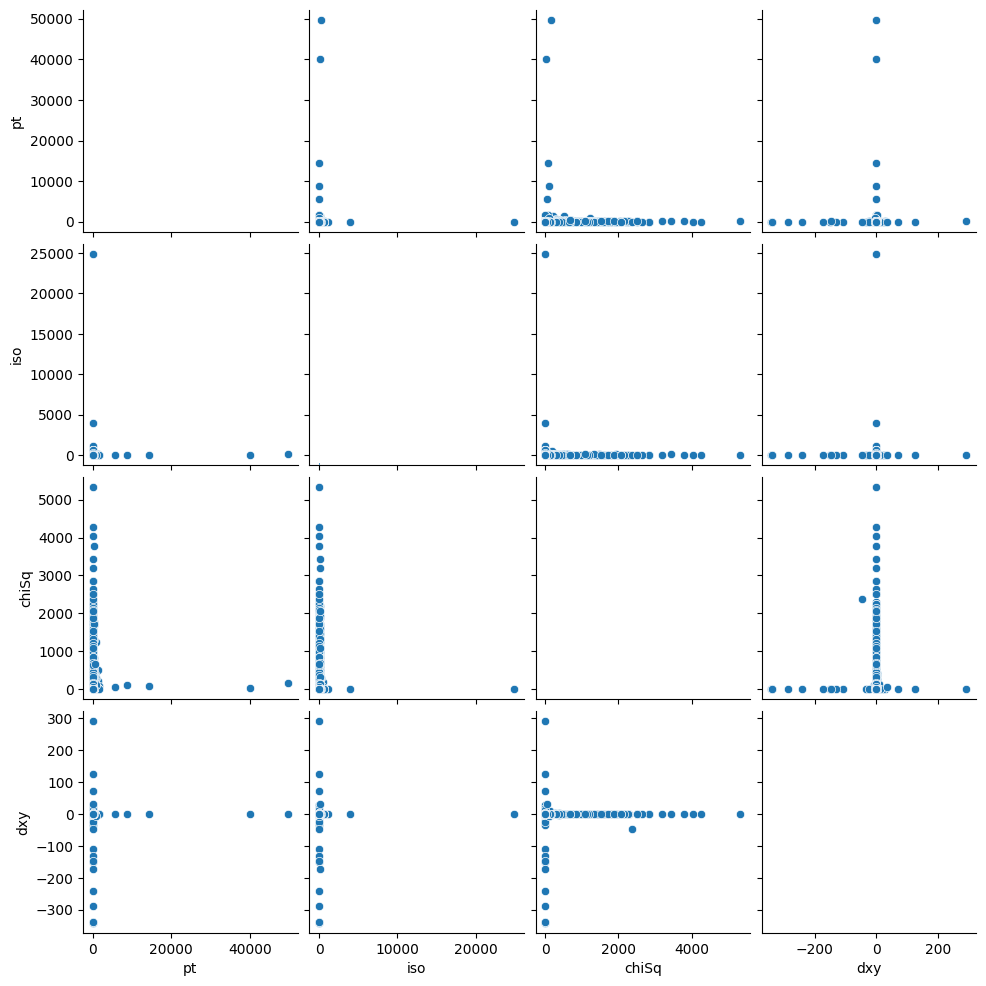

In [12]:
import seaborn as sns

sns.pairplot(df[["pt", "iso", "chiSq", "dxy"]])
plt.show()

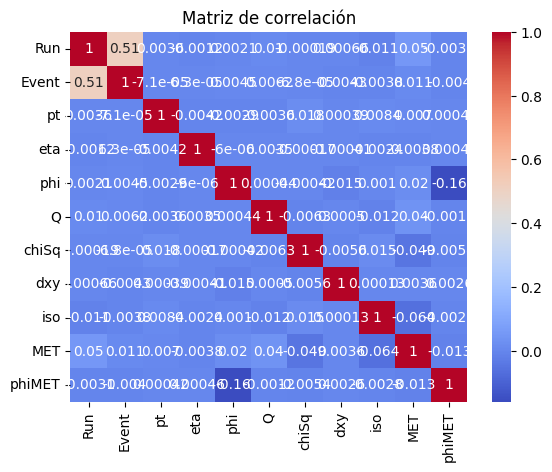

In [6]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


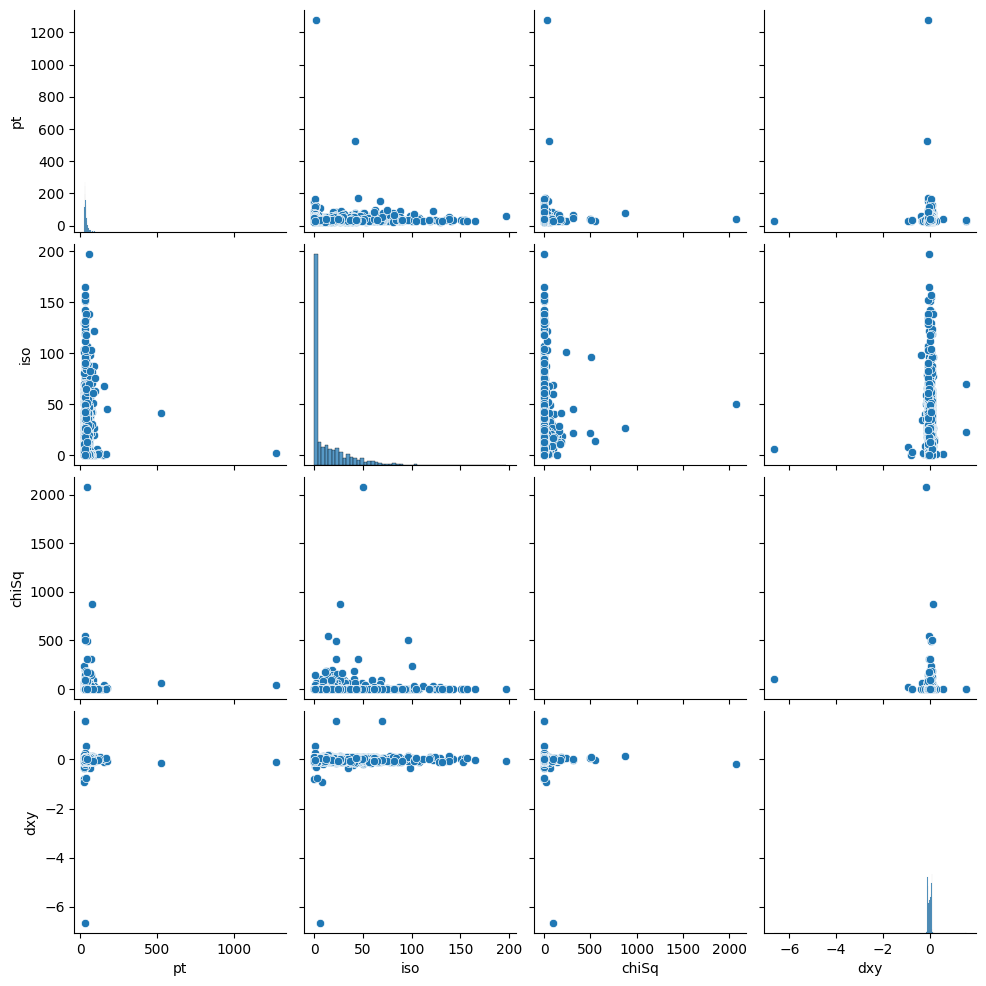

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usar muestra aleatoria representativa
df_sample = df[["pt", "iso", "chiSq", "dxy"]].sample(n=2000, random_state=42)

sns.pairplot(df_sample)
plt.show()

In [20]:
delta_phi = np.abs(df["phi"] - df["phiMET"])
delta_phi = np.where(delta_phi > np.pi, 2*np.pi - delta_phi, delta_phi)
df["delta_phi_MET"] = delta_phi


In [22]:
df["MET_parallel"] = df["MET"] * np.cos(df["delta_phi_MET"])
df["MET_parallel"]

0       -28.856772
1       -14.819427
2        -2.298933
3         3.925592
4       -20.792939
           ...    
99995    -0.592297
99996    -7.193717
99997   -21.746832
99998   -15.284921
99999   -47.624373
Name: MET_parallel, Length: 100000, dtype: float64